# Yelp 数据集介绍
数据集整理自Yelp官方公开的商户、点评和用户数据。整理好的Yelp数据集包含位于费城的所有餐馆信息(restaurants_at_pa.txt)、所有餐馆在2018年1月至2021年12月的四年时间中累积的评论数(reviews_of_restaurants.txt)和所有相关用户个人信息(users.txt)。各件文的数据字段名称为：
#### biz_res.txt
- business_id 商户ID
- name	商户名称
- address	地址
- latitude	
- longitude	
- stars	总体评分
- review_count	商户收到评论数量
- is_open	是否在营
- categories 类别
#### review_res.txt
- review_id	评论ID
- user_id 用户	
- business_id 商户ID
- stars	评分
- date	时间
- useful 被认为有用的次数	
- text 评论内容
#### user_res.txt
- user_id 用户ID
- name	用户名称
- review_count	用户评论数量
- yelping_since	 开始使用yelp的时间
- num_friends	好友
- useful 用户被认为有用的次数	
- fans	粉丝
- average_stars 用户平均打分
# 1. 合并数据集

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
business=pd.read_csv("D:/大四上/数据挖掘与商业分析/期末final 1.14/Data/Data/sample/restaurants_at_pa.txt",delimiter='\t')
business=business.rename(columns={'name':'business_name'})
business=business.rename(columns={'stars':'business_stars'})
print(business.shape)
business.head()

(5852, 9)


,business_id,business_name,address,latitude,longitude,business_stars,review_count,is_open,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,39.955505,-75.155564,4.0,80,1,"Food, Bubble Tea, Coffee & Tea, Bakeries"
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,39.953949,-75.143226,4.0,245,1,"Sushi Bars, Japanese"
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,39.943223,-75.162568,4.5,205,1,Korean
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,39.939825,-75.157447,4.0,65,0,"Cocktail Bars, Bars, Italian, Nightlife"
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,40.022466,-75.218314,3.0,41,0,"Pizza, Salad, Soup"


In [4]:
review = pd.read_csv('D:/大四上/数据挖掘与商业分析/期末final 1.14/Data/Data/sample/reviews_of_restaurants.txt', delimiter='\t')
print(review.shape)
review.head()

(216902, 7)


,review_id,user_id,business_id,stars,date,useful,text
0,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-08-23 21:39:38,0,My boyfriend and I tried this deli for the fir...
1,4KpIldEM-tdnrJLqYzRfZQ,Z5j9Xw_G0c7M2b1-iS67wg,HTqXI5S2XcSlh_ylx9sE6g,5.0,2018-03-23 14:35:33,1,I've only had the cannolis here but they are a...
2,t4vzUBVfAPfg7i1EB9Y_6Q,vFd8aBLg1kFcd0kCkoi-xw,GUMVStVaJfWmCIpQA4TtHg,4.0,2018-03-15 20:24:34,0,I deducted one star because the service was no...
3,XiAI47_GWuqV0cxwuYB3Bw,zg2FNzIq6s7n41H1E5NnWg,DsKzHnkLKnxZTVsFpts4oA,4.0,2018-05-28 20:37:32,1,Went here with a few friends as the place to h...
4,qMVwOQNDqYzwodlFJ81GNw,pqlLJVba9KAtahkjvNINYg,Dv6RfXLYe1atjgz3Xf4GGw,4.0,2018-07-26 12:37:10,0,"Great location, great food, and friendly staff..."


In [5]:
user=pd.read_csv("D:/大四上/数据挖掘与商业分析/期末final 1.14/Data/Data/sample/users.txt",delimiter='\t')
user=user.rename(columns={'useful':'user_useful'})
user=user.rename(columns={'name':'user_name'})
print(user.shape)
user.head()

(91700, 8)


,user_id,user_name,review_count,yelping_since,num_friends,user_useful,fans,average_stars
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,4646,43091,3138,3.74
1,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,998,12773,345,3.69
2,IpLRJY4CP3fXtlEd8Y4GFQ,Robyn,518,2009-04-11 14:35:46,605,1325,35,2.95
3,qsHZ6_yT870pmm4Oxvw5Og,Debbie,39,2011-06-16 01:55:54,290,68,5,3.85
4,lquc6IF6uGIeRomDLu9UnA,Ron,1044,2007-10-04 01:20:53,944,6025,241,3.90


In [6]:
#合并数据集
data = review.merge(user, on='user_id').merge(business, on='business_id')

In [7]:
data.head()

,review_id,user_id,business_id,stars,date,useful,text,user_name,review_count_x,yelping_since,...,fans,average_stars,business_name,address,latitude,longitude,business_stars,review_count_y,is_open,categories
0,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-08-23 21:39:38,0,My boyfriend and I tried this deli for the fir...,Jenna,84,2017-07-07 00:33:21,...,5,3.93,The Coventry Deli,2000 Market St,39.953291,-75.173645,4.0,65,1,"Delis, Salad, Sandwiches"
1,g4x99WnqcdE7AL71SHRCmg,pqlLJVba9KAtahkjvNINYg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-07-20 21:13:28,0,Recently started working in center city and wh...,Caitlin,103,2017-03-18 14:31:08,...,7,4.60,The Coventry Deli,2000 Market St,39.953291,-75.173645,4.0,65,1,"Delis, Salad, Sandwiches"
2,xM4eZRiOhes1GrfWnyYF2g,tdYG7gu6LJkQU8AGPMdErQ,kq5Ghhh14r-eCxlVmlyd8w,1.0,2018-03-14 18:25:34,0,I come here everyday and today I realized that...,Gabriela,17,2016-11-19 17:57:27,...,0,4.06,The Coventry Deli,2000 Market St,39.953291,-75.173645,4.0,65,1,"Delis, Salad, Sandwiches"
3,J1zRtQ22GZEUDtVTIB4Zpw,o1NR8JURLhdRlSWUwIXMIw,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-08-08 17:33:35,0,First time to really spend time in Philly Cent...,Letitia,10,2018-07-25 16:43:51,...,0,4.40,The Coventry Deli,2000 Market St,39.953291,-75.173645,4.0,65,1,"Delis, Salad, Sandwiches"
4,2g2tEc3NqohtGxVdV6dbWg,7L7ZqJHm9rVYlrA5WiFjMg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-03-14 23:48:01,0,The freshest deli bread anywhere in Center Cit...,Anthony,3,2015-05-25 21:04:19,...,0,5.00,The Coventry Deli,2000 Market St,39.953291,-75.173645,4.0,65,1,"Delis, Salad, Sandwiches"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216902 entries, 0 to 216901
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review_id       216902 non-null  object 
 1   user_id         216902 non-null  object 
 2   business_id     216902 non-null  object 
 3   stars           216902 non-null  float64
 4   date            216902 non-null  object 
 5   useful          216902 non-null  int64  
 6   text            216902 non-null  object 
 7   user_name       216902 non-null  object 
 8   review_count_x  216902 non-null  int64  
 9   yelping_since   216902 non-null  object 
 10  num_friends     216902 non-null  int64  
 11  user_useful     216902 non-null  int64  
 12  fans            216902 non-null  int64  
 13  average_stars   216902 non-null  float64
 14  business_name   216902 non-null  object 
 15  address         216619 non-null  object 
 16  latitude        216902 non-null  float64
 17  longitude 

In [9]:
data.shape
data.to_csv(r'D:\大四上\数据挖掘与商业分析\期末final 1.14\data.csv', index=False)

# 3.因变量处理

In [10]:
data['useful'].value_counts()

0      124693
1       48810
2       20639
3        9567
4        4603
        ...  
142         1
96          1
76          1
88          1
64          1
Name: useful, Length: 89, dtype: int64

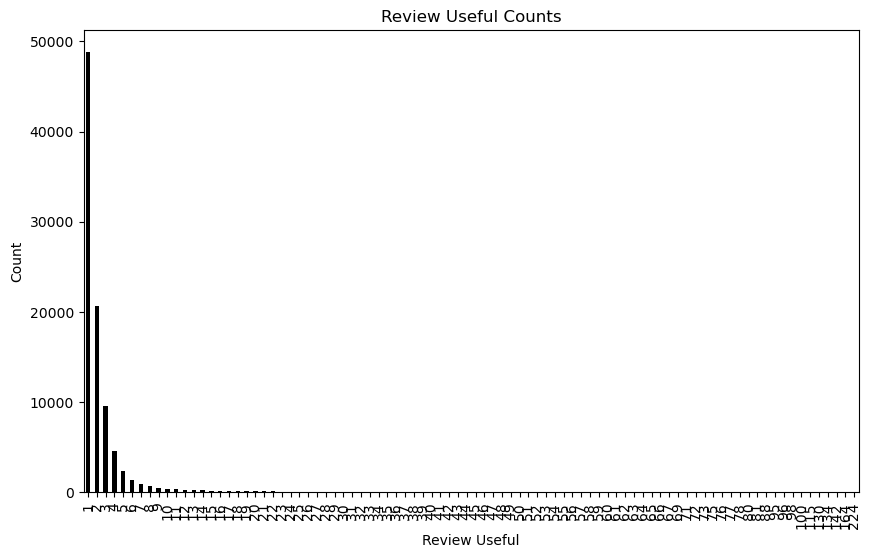

In [11]:
import matplotlib.pyplot as plt

# 去除'review_useful'列中的0值
data_non_zero = data[data['useful'] != 0]

# 对'review_useful'列进行统计
review_useful_counts = data_non_zero['useful'].value_counts().sort_index()

# 创建一个新的figure
plt.figure(figsize=(10,6))

# 生成条形图
review_useful_counts.plot(kind='bar',color='black')

# 设置标题和标签
plt.title('Review Useful Counts')
plt.xlabel('Review Useful')
plt.ylabel('Count')

# 显示图形
plt.show()

依照柱形图可以看出数据集中分布在0附近,考虑将useful分等级处理

0    124693
1     48810
2     42641
3       677
4        81
Name: useful_bins, dtype: int64


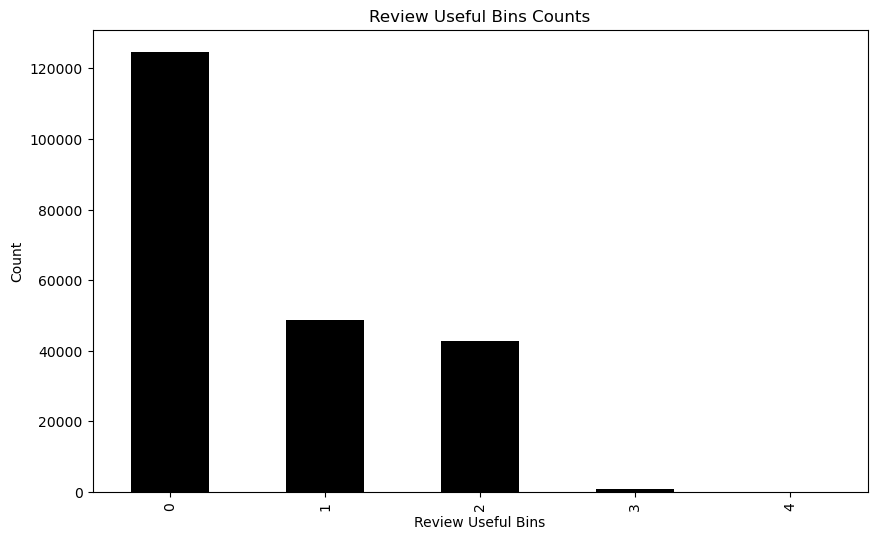

In [12]:
# 定义分箱边界
bins = [-1, 0,1, 20, 50, 250]

# 使用cut函数进行分箱
data['useful_bins'] = pd.cut(data['useful'], bins)

# 将分箱后的数据进行编号
data['useful_bins'] = data['useful_bins'].cat.codes

# 查看分箱结果
print(data['useful_bins'].value_counts())

# 对'review_useful_bins'列进行统计
review_useful_bins_counts = data['useful_bins'].value_counts().sort_index()

# 创建一个新的figure
plt.figure(figsize=(10,6))

# 生成条形图
review_useful_bins_counts.plot(kind='bar', color='black')

# 设置标题和标签
plt.title('Review Useful Bins Counts')
plt.xlabel('Review Useful Bins')
plt.ylabel('Count')

# 显示图形
plt.show()


# 3.数据预处理
这里主要是对文本text字段的预处理

In [13]:
from textblob import TextBlob, Word
import nltk
import pandas as pd
import string
from nltk.corpus import stopwords

# 加载分词器tokenize
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
# 加载停用词filter stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))

#定义预处理函数
def preprocess(text):
    # 词条化，按句子切分
    sents = tokenizer.tokenize(text.lower())
    words = []
    # 规范化，根据词性转换
    for sent in sents:
        words += lemmatize_with_postag(sent)
    words_s = []
    for w in words:
        # 移除标点
        w_s = w.translate(w.maketrans("", "", string.punctuation))
        # 去除停用词、数字串等噪音
        if check(w_s):
            words_s.append(w_s)
    return words_s

#定义词形还原函数
word_map = {}
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {'J': 'a', 'N': 'n', 'V': 'v', 'R': 'r'}
    lemmatized_list = []
    for w, pos in sent.tags:
        tag = tag_dict.get(pos[0], 'n')
        key = w + '+' + tag
        if key in word_map:
            lemmatized_list.append(word_map[key])
        else:
            w_tmp = w.lemmatize(tag)
            word_map[key] = w_tmp
            lemmatized_list.append(w_tmp)
    return lemmatized_list

#定义检查函数：用于检查单词是否满足特定条件
# 长度是否大于3，是否为数字，是否为停用词，是否以字母开头
word_check = {}
def check(word):
    if word in word_check:
        return word_check[word]
    if len(word) < 3:
        word_check[word] = False
        return False
    elif word.isdigit():
        word_check[word] = False
        return False
    elif word in stop_words:
        word_check[word] = False
        return False
    elif not word[0].isalpha():
        word_check[word] = False
        return False
    else:
        word_check[word] = True
        return True

In [14]:
# 对 'text' 字段进行预处理
data['review_preprocessed'] = data['text'].apply(preprocess)

# 3.特征工程
根据参考资料https://blog.csdn.net/kafei110/article/details/125617369
消费者角度下的有用评论参考以下几个维度：
- 评论内容特征：评论及时性、评论内容的信息和情感、评分与平均星级的差异
- 评论者特征：评论者的网络中心度、评论者的关系多样性
- 餐厅知名度

我们考虑保留以下变量：
- 评论者：粉丝数、好友数、评论数量
- 商户：商户是否在营、商户收到的评论数量

我们对以下变量进行特征提取：
- 评论内容：评论文本的情感与主题（考虑聚类）、评论时间、评论星级
- 评论者特征：使用yelp时间

### 基于评论的特征构建

1）评论星级和商户星级的差异

In [15]:
data['dif_stars']=data['business_stars']-data['stars']

2）评论的新旧

In [16]:
# 评论的新旧
data['date'] = pd.to_datetime(data['date'])
data['day_since_date'] = (pd.Timestamp('2021-12-31') - data['date']).dt.days
data['year_since_review'] = round(data['day_since_date']/ 365, 1)

3）评论主题和情感

见preprocess.ipynb文件

In [17]:
from gensim import corpora, models

review_preprocessed = data['review_preprocessed']

# 为了使用 LDA，需要将文本转换为词袋表示
dictionary = corpora.Dictionary(review_preprocessed)
corpus = [dictionary.doc2bow(text) for text in review_preprocessed]

# 指定主题数量
topic_n = 50

# 训练 LDA 模型
lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=topic_n, passes=10, alpha='auto', eta='auto')

# 打印前10个主题
topic_list = lda.print_topics(num_topics=10)
for topic in topic_list:
    print(topic)

(26, '0.222*"taco" + 0.111*"chip" + 0.060*"mexican" + 0.050*"chipotle" + 0.048*"margarita" + 0.039*"quesadilla" + 0.039*"salsa" + 0.033*"tortilla" + 0.032*"nacho" + 0.029*"guacamole"')
(25, '0.138*"burrito" + 0.067*"frozen" + 0.065*"double" + 0.051*"board" + 0.032*"stew" + 0.031*"promise" + 0.028*"coupon" + 0.024*"broad" + 0.022*"dad" + 0.021*"idk"')
(5, '0.053*"finger" + 0.045*"garden" + 0.041*"pound" + 0.038*"steam" + 0.037*"milkshake" + 0.033*"coworker" + 0.033*"serving" + 0.032*"manner" + 0.031*"deep" + 0.030*"togo"')
(48, '0.140*"wine" + 0.100*"glass" + 0.093*"bottle" + 0.075*"pickup" + 0.070*"shot" + 0.061*"anymore" + 0.048*"quiet" + 0.047*"efficient" + 0.037*"partner" + 0.028*"cant"')
(43, '0.154*"hoagie" + 0.125*"black" + 0.095*"corn" + 0.063*"duck" + 0.051*"def" + 0.046*"skewer" + 0.038*"skip" + 0.035*"oyster" + 0.032*"shell" + 0.029*"famous"')
(49, '0.102*"table" + 0.093*"night" + 0.063*"dinner" + 0.049*"seat" + 0.035*"party" + 0.030*"late" + 0.024*"server" + 0.024*"group" + 

In [18]:
# 获取每个文档的主题分布
topics = lda.get_document_topics(corpus)

# 获取每个文档的主要主题编号
main_topic = [max(tp, key=lambda x: x[1])[0] for tp in topics]

# 将文本长度添加到review数据框中
data['main_topic'] = main_topic


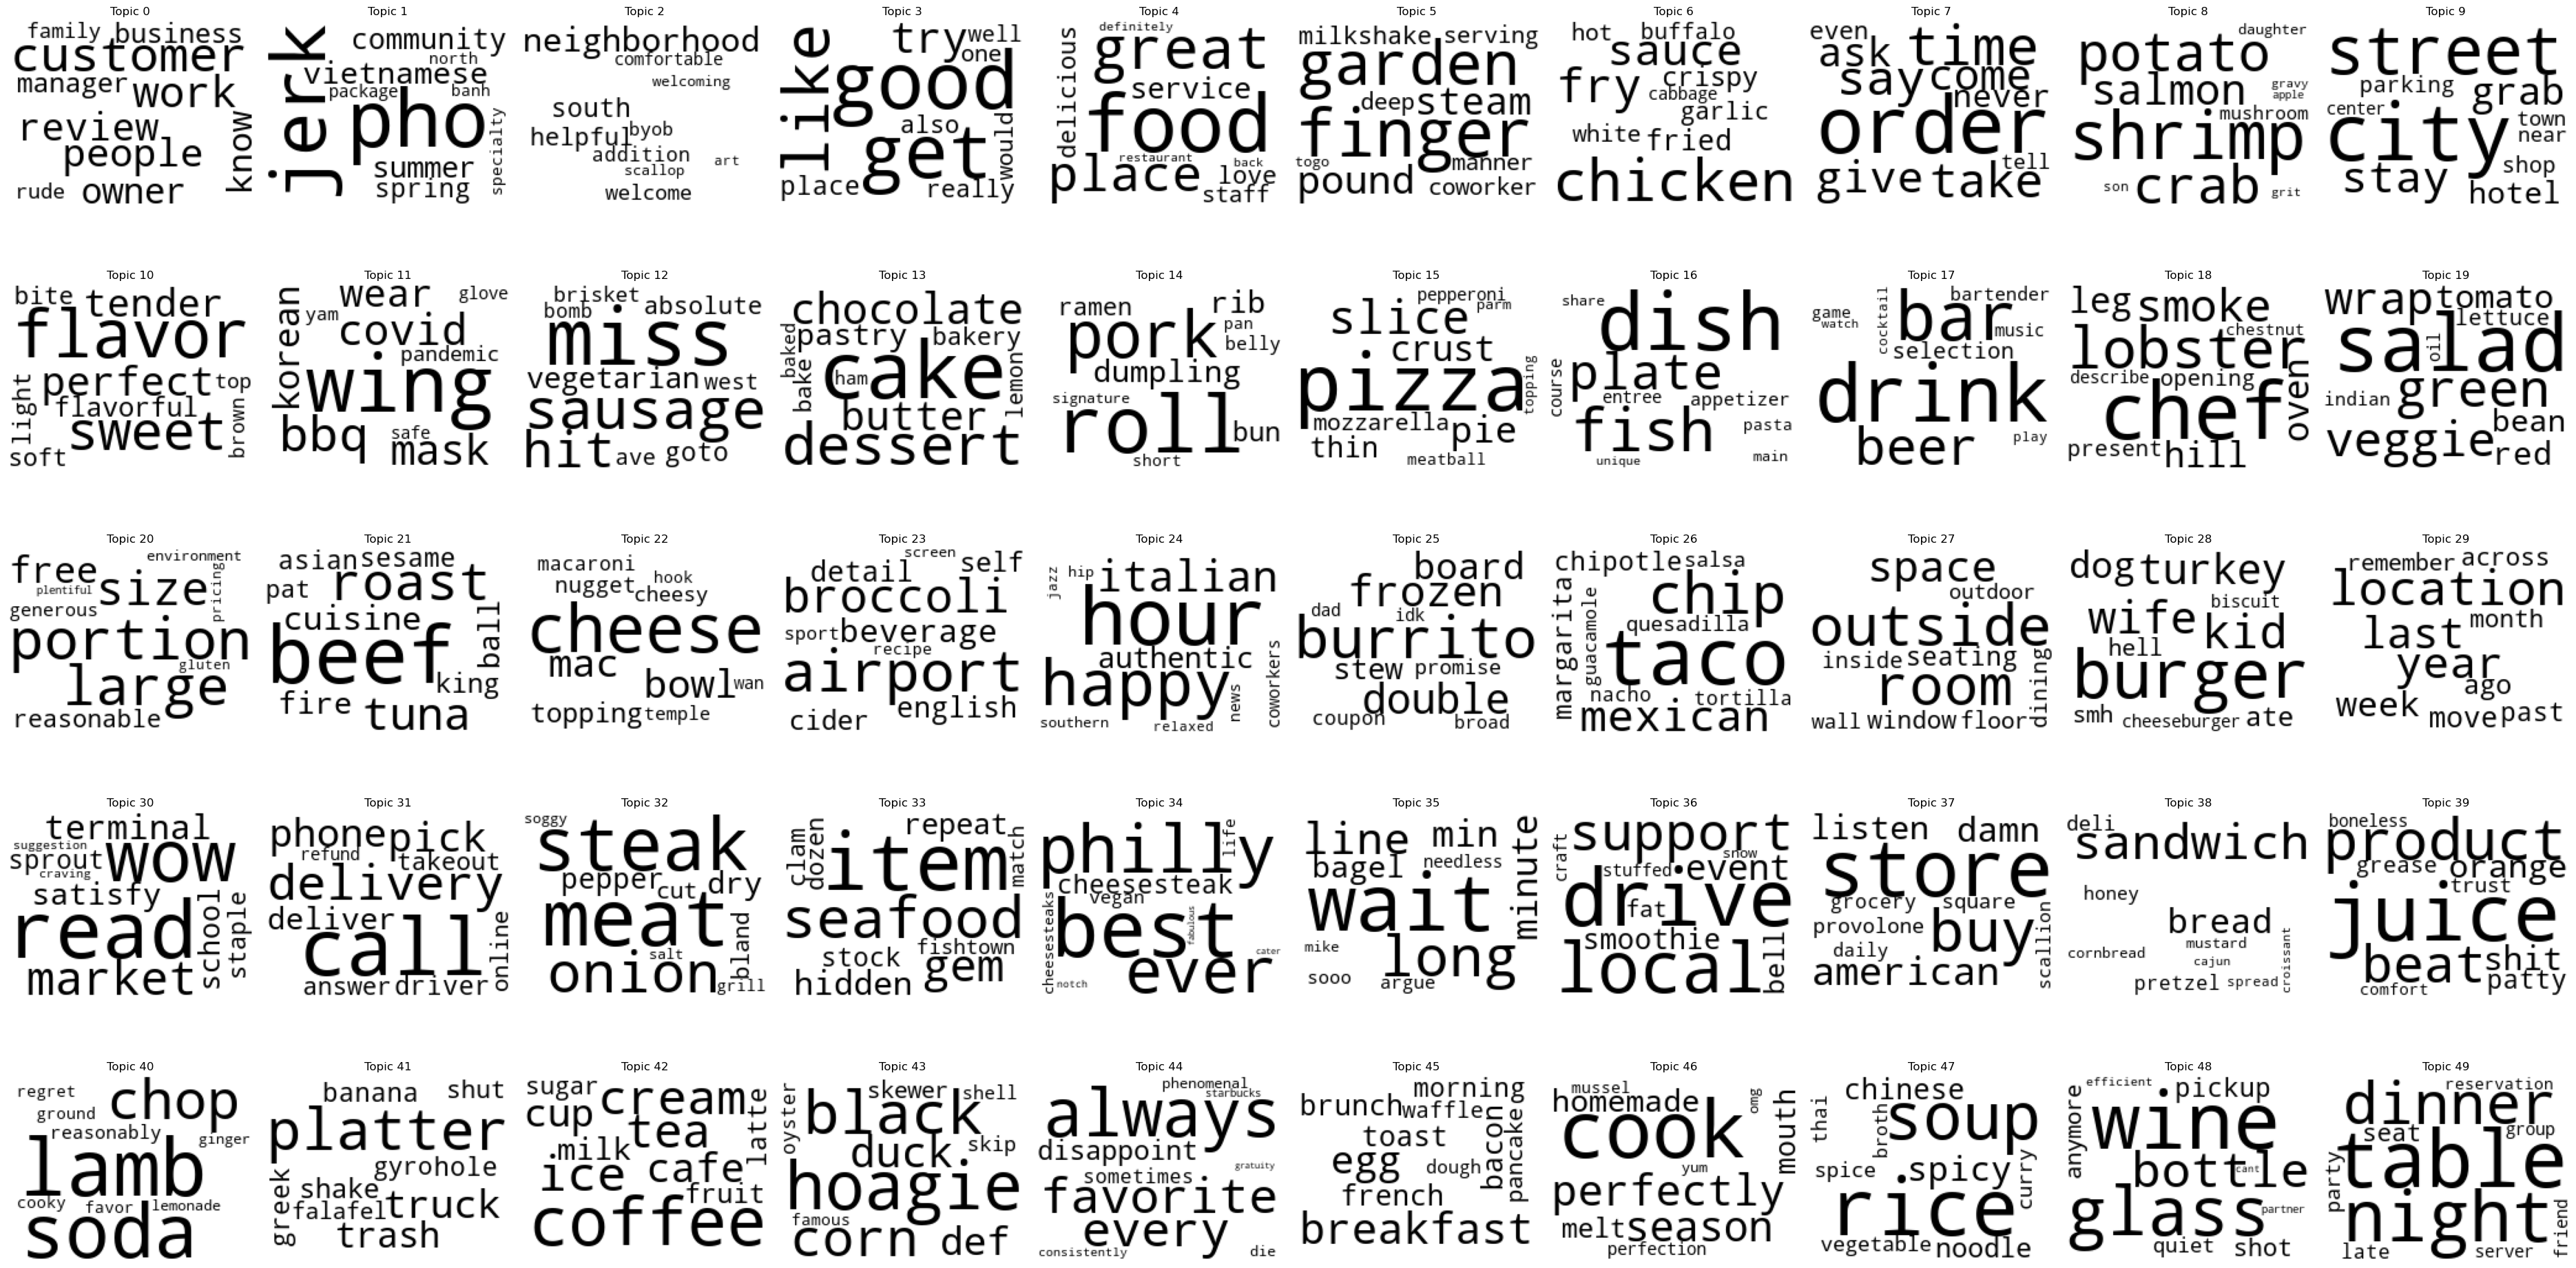

In [19]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', width = 200, height = 150, max_words = 20, color_func = lambda *args, **kwargs: 'black')
topics = lda.show_topics(formatted = False, num_topics = 50)

fig, axes = plt.subplots(5, 10, figsize = (37.5, 20), sharex = True, sharey = True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size = 64)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict = dict(size=12))
    plt.gca().axis('off')


plt.subplots_adjust(wspace = 0, hspace = 0)
plt.margins(x = 0, y = 0)
plt.tight_layout()
plt.show()

4）评论内容长度和有效性

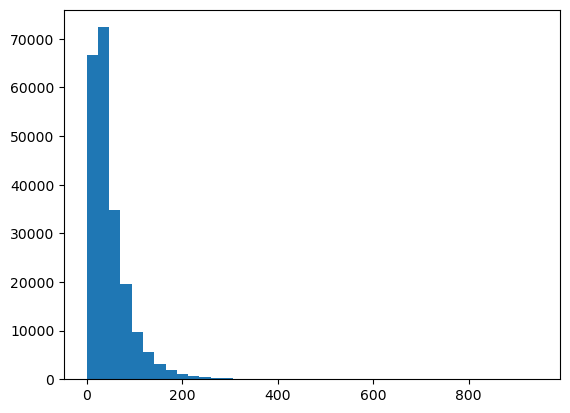

In [20]:
review_lst = list(data.review_preprocessed)

doc_len = []
for review in review_lst:
    doc_len.append(len(review))  # 直接获取子列表的长度

plt.hist(doc_len, bins=40)
plt.show()

在分词预处理后，多数评论的单词量在 120 词以下

In [21]:
# 计算每个预处理后的评论的单词数量，并将结果添加为新列 'review_length'
data['review_length_1'] = data['review_preprocessed'].apply(lambda review: len(review))

In [22]:
#统计text内未被处理后的单词数
data['review_length_2'] = data['text'].apply(lambda review:len(review.split()))


In [23]:
#看看text内有效词占比
data['useful_word_ratio']=data['review_length_1']/data['review_length_2'] 

In [24]:
data.head()

,review_id,user_id,business_id,stars,date,useful,text,user_name,review_count_x,yelping_since,...,categories,useful_bins,review_preprocessed,dif_stars,day_since_date,year_since_review,main_topic,review_length_1,review_length_2,useful_word_ratio
0,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-08-23 21:39:38,0,My boyfriend and I tried this deli for the fir...,Jenna,84,2017-07-07 00:33:21,...,"Delis, Salad, Sandwiches",0,"[boyfriend, try, deli, first, time, today, tur...",-1.0,1225,3.4,3,35,73,0.479452
1,g4x99WnqcdE7AL71SHRCmg,pqlLJVba9KAtahkjvNINYg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-07-20 21:13:28,0,Recently started working in center city and wh...,Caitlin,103,2017-03-18 14:31:08,...,"Delis, Salad, Sandwiches",0,"[recently, start, work, center, city, find, ge...",-1.0,1259,3.4,3,55,110,0.500000
2,xM4eZRiOhes1GrfWnyYF2g,tdYG7gu6LJkQU8AGPMdErQ,kq5Ghhh14r-eCxlVmlyd8w,1.0,2018-03-14 18:25:34,0,I come here everyday and today I realized that...,Gabriela,17,2016-11-19 17:57:27,...,"Delis, Salad, Sandwiches",0,"[come, everyday, today, realize, endorse, sexi...",3.0,1387,3.8,7,111,243,0.456790
3,J1zRtQ22GZEUDtVTIB4Zpw,o1NR8JURLhdRlSWUwIXMIw,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-08-08 17:33:35,0,First time to really spend time in Philly Cent...,Letitia,10,2018-07-25 16:43:51,...,"Delis, Salad, Sandwiches",0,"[first, time, really, spend, time, philly, cen...",-1.0,1240,3.4,3,32,62,0.516129
4,2g2tEc3NqohtGxVdV6dbWg,7L7ZqJHm9rVYlrA5WiFjMg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-03-14 23:48:01,0,The freshest deli bread anywhere in Center Cit...,Anthony,3,2015-05-25 21:04:19,...,"Delis, Salad, Sandwiches",0,"[fresh, deli, bread, anywhere, center, city, f...",-1.0,1387,3.8,3,12,18,0.666667


利用categories看有效词

In [25]:
# 替换 data.categories 中的 NaN 值为一个空字符串
data['categories'] = data['categories'].fillna('')

# 应用预处理函数
data['categories_preprocessed'] = data['categories'].apply(preprocess)

In [26]:
def count_words_in_categories(review, categories):
    # 计算 review 中有多少个单词出现在 categories 中
    return sum(word in categories for word in review)

# 应用自定义函数
data['words_in_categories_count'] = data.apply(lambda row: count_words_in_categories(row['review_preprocessed'], row['categories_preprocessed']), axis=1)

# 显示更新后的 DataFrame 的前几行以检查新列
data.head()

,review_id,user_id,business_id,stars,date,useful,text,user_name,review_count_x,yelping_since,...,review_preprocessed,dif_stars,day_since_date,year_since_review,main_topic,review_length_1,review_length_2,useful_word_ratio,categories_preprocessed,words_in_categories_count
0,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-08-23 21:39:38,0,My boyfriend and I tried this deli for the fir...,Jenna,84,2017-07-07 00:33:21,...,"[boyfriend, try, deli, first, time, today, tur...",-1.0,1225,3.4,3,35,73,0.479452,"[deli, salad, sandwich]",4
1,g4x99WnqcdE7AL71SHRCmg,pqlLJVba9KAtahkjvNINYg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-07-20 21:13:28,0,Recently started working in center city and wh...,Caitlin,103,2017-03-18 14:31:08,...,"[recently, start, work, center, city, find, ge...",-1.0,1259,3.4,3,55,110,0.500000,"[deli, salad, sandwich]",3
2,xM4eZRiOhes1GrfWnyYF2g,tdYG7gu6LJkQU8AGPMdErQ,kq5Ghhh14r-eCxlVmlyd8w,1.0,2018-03-14 18:25:34,0,I come here everyday and today I realized that...,Gabriela,17,2016-11-19 17:57:27,...,"[come, everyday, today, realize, endorse, sexi...",3.0,1387,3.8,7,111,243,0.456790,"[deli, salad, sandwich]",2
3,J1zRtQ22GZEUDtVTIB4Zpw,o1NR8JURLhdRlSWUwIXMIw,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-08-08 17:33:35,0,First time to really spend time in Philly Cent...,Letitia,10,2018-07-25 16:43:51,...,"[first, time, really, spend, time, philly, cen...",-1.0,1240,3.4,3,32,62,0.516129,"[deli, salad, sandwich]",0
4,2g2tEc3NqohtGxVdV6dbWg,7L7ZqJHm9rVYlrA5WiFjMg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-03-14 23:48:01,0,The freshest deli bread anywhere in Center Cit...,Anthony,3,2015-05-25 21:04:19,...,"[fresh, deli, bread, anywhere, center, city, f...",-1.0,1387,3.8,3,12,18,0.666667,"[deli, salad, sandwich]",1


利用主题词看有效词

In [27]:
# 提取所有主题
all_topics = lda.print_topics(num_topics=topic_n, num_words=10)

# 初始化一个空列表来存储主题词
all_topic_words = []

# 遍历每个主题，提取主题词
for topic in all_topics:
    topic_words = topic[1].split('+')
    # 提取每个主题词并去除额外的字符
    for word in topic_words:
        word_clean = word.split('*')[1].strip().replace('"', '')
        all_topic_words.append(word_clean)

# 输出提取的主题词列表长度
len(all_topic_words)

500

In [28]:
# 使用 set 去除重复的主题词
unique_topic_words = set(all_topic_words)

# 再将其转换回列表
unique_topic_words_list = list(unique_topic_words)

# 输出去重后的主题词列表长度
len(unique_topic_words_list)

498

In [29]:
def count_topic_words_in_review(review, topic_words):
    # 计算评论中有多少单词出现在主题词列表中
    return sum(word in topic_words for word in review)

# 应用这个函数到每个评论，并将结果存储为新的列
data['topic_words_count'] = data['review_preprocessed'].apply(lambda review: count_topic_words_in_review(review, unique_topic_words_list))

# 创建新列来存储比值
data['topic_words_ratio'] = data['topic_words_count'] / data['review_length_1']

# 用于避免除以零的错误
data['topic_words_ratio'].fillna(0, inplace=True)
data.head()

,review_id,user_id,business_id,stars,date,useful,text,user_name,review_count_x,yelping_since,...,day_since_date,year_since_review,main_topic,review_length_1,review_length_2,useful_word_ratio,categories_preprocessed,words_in_categories_count,topic_words_count,topic_words_ratio
0,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-08-23 21:39:38,0,My boyfriend and I tried this deli for the fir...,Jenna,84,2017-07-07 00:33:21,...,1225,3.4,3,35,73,0.479452,"[deli, salad, sandwich]",4,22,0.628571
1,g4x99WnqcdE7AL71SHRCmg,pqlLJVba9KAtahkjvNINYg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-07-20 21:13:28,0,Recently started working in center city and wh...,Caitlin,103,2017-03-18 14:31:08,...,1259,3.4,3,55,110,0.500000,"[deli, salad, sandwich]",3,27,0.490909
2,xM4eZRiOhes1GrfWnyYF2g,tdYG7gu6LJkQU8AGPMdErQ,kq5Ghhh14r-eCxlVmlyd8w,1.0,2018-03-14 18:25:34,0,I come here everyday and today I realized that...,Gabriela,17,2016-11-19 17:57:27,...,1387,3.8,7,111,243,0.456790,"[deli, salad, sandwich]",2,36,0.324324
3,J1zRtQ22GZEUDtVTIB4Zpw,o1NR8JURLhdRlSWUwIXMIw,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-08-08 17:33:35,0,First time to really spend time in Philly Cent...,Letitia,10,2018-07-25 16:43:51,...,1240,3.4,3,32,62,0.516129,"[deli, salad, sandwich]",0,15,0.468750
4,2g2tEc3NqohtGxVdV6dbWg,7L7ZqJHm9rVYlrA5WiFjMg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-03-14 23:48:01,0,The freshest deli bread anywhere in Center Cit...,Anthony,3,2015-05-25 21:04:19,...,1387,3.8,3,12,18,0.666667,"[deli, salad, sandwich]",1,5,0.416667


In [30]:
#创建主题词的向量

### 基于评论者的特征构建

1）回头客

In [31]:
# 对每个用户在每家餐厅的评论次数进行计数
data['visit_count'] = data.groupby(['user_id', 'business_id'])['date'].transform('count')

# 标记回头客评论（评论次数 > 1）
data['is_repeat_customer'] = data['visit_count'] > 1

# 标记回头客次数（评论次数 - 1）
data['repeat_customer_count'] = data['visit_count'] - 1

2）用户评论平均有用度

In [32]:
data['useful_avg'] = data[ 'useful'] / data[ 'review_count_x']

3）用户使用时间

In [33]:
# 用户yelp使用年数
data['yelping_since'] = pd.to_datetime(data['yelping_since'])
data['days_since_yelping'] = (pd.Timestamp('2021-12-31') - data['yelping_since']).dt.days
data['year_since_yelping'] = round(data['days_since_yelping']/ 365, 1)

### 特征变量的处理

In [34]:
data['business_id'].value_counts()

ytynqOUb3hjKeJfRj5Tshw    1703
RQAF6a0akMiot5lZZnMNNw    1414
AGlh4ZDv6jnoiYfz7At9mw    1193
iksVwRfpWymIUUFqw0tXpw    1146
vUrTGX_7HxqeoQ_6QCVz6g    1125
                          ... 
nsH0hQ7xB5LS2_Ba3mqHTQ       1
-UgmhgFa6biagbAXEPpNhA       1
_4E8aECY-679SxLH4R0Z3g       1
wNj6mfivohSUpwP5AjmLoQ       1
i1pGM3unRHXWLr15yyeL9Q       1
Name: business_id, Length: 4425, dtype: int64

In [35]:
data['business_name'].value_counts()

Reading Terminal Market           1703
Dalessandro’s Steaks & Hoagies    1414
Green Eggs Café                   1293
Dim Sum Garden                    1193
Chubby Cattle                     1146
                                  ... 
Surf and Turf Market                 1
La Esquina del Bronco                1
Amoroso's                            1
University Club at Penn              1
Astral Plane                         1
Name: business_name, Length: 3805, dtype: int64

In [36]:
re_cat=['stars','main_topic','business_name','user_id']
for col in re_cat:
    t = data.groupby(col,as_index=False)['useful'].agg(
        {col+'_count':'count',col+'_useful_max':'max',col+'_useful_median':'median',
         col+'_useful_min':'min',col+'_useful_sum':'sum',col+'_useful_std':'std',col+'_useful_mean':'mean'})
    data = pd.merge(data,t,on=col,how='left')

In [37]:
data.head()

,review_id,user_id,business_id,stars,date,useful,text,user_name,review_count_x,yelping_since,...,business_name_useful_sum,business_name_useful_std,business_name_useful_mean,user_id_count,user_id_useful_max,user_id_useful_median,user_id_useful_min,user_id_useful_sum,user_id_useful_std,user_id_useful_mean
0,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-08-23 21:39:38,0,My boyfriend and I tried this deli for the fir...,Jenna,84,2017-07-07 00:33:21,...,12,2.558409,1.0,35,6,0.0,0,27,1.496775,0.771429
1,g4x99WnqcdE7AL71SHRCmg,pqlLJVba9KAtahkjvNINYg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-07-20 21:13:28,0,Recently started working in center city and wh...,Caitlin,103,2017-03-18 14:31:08,...,12,2.558409,1.0,21,5,0.0,0,10,1.209093,0.476190
2,xM4eZRiOhes1GrfWnyYF2g,tdYG7gu6LJkQU8AGPMdErQ,kq5Ghhh14r-eCxlVmlyd8w,1.0,2018-03-14 18:25:34,0,I come here everyday and today I realized that...,Gabriela,17,2016-11-19 17:57:27,...,12,2.558409,1.0,7,3,0.0,0,6,1.214986,0.857143
3,J1zRtQ22GZEUDtVTIB4Zpw,o1NR8JURLhdRlSWUwIXMIw,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-08-08 17:33:35,0,First time to really spend time in Philly Cent...,Letitia,10,2018-07-25 16:43:51,...,12,2.558409,1.0,4,0,0.0,0,0,0.000000,0.000000
4,2g2tEc3NqohtGxVdV6dbWg,7L7ZqJHm9rVYlrA5WiFjMg,kq5Ghhh14r-eCxlVmlyd8w,5.0,2018-03-14 23:48:01,0,The freshest deli bread anywhere in Center Cit...,Anthony,3,2015-05-25 21:04:19,...,12,2.558409,1.0,1,0,0.0,0,0,NaN,0.000000


### 删除多余变量

In [38]:
data.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'useful',
       'text', 'user_name', 'review_count_x', 'yelping_since', 'num_friends',
       'user_useful', 'fans', 'average_stars', 'business_name', 'address',
       'latitude', 'longitude', 'business_stars', 'review_count_y', 'is_open',
       'categories', 'useful_bins', 'review_preprocessed', 'dif_stars',
       'day_since_date', 'year_since_review', 'main_topic', 'review_length_1',
       'review_length_2', 'useful_word_ratio', 'categories_preprocessed',
       'words_in_categories_count', 'topic_words_count', 'topic_words_ratio',
       'visit_count', 'is_repeat_customer', 'repeat_customer_count',
       'useful_avg', 'days_since_yelping', 'year_since_yelping', 'stars_count',
       'stars_useful_max', 'stars_useful_median', 'stars_useful_min',
       'stars_useful_sum', 'stars_useful_std', 'stars_useful_mean',
       'main_topic_count', 'main_topic_useful_max', 'main_topic_useful_median',
       'main_topic_useful

In [39]:
data_s=data.drop(columns=['business_name', 'address', 'text', 'latitude', 'longitude', 'categories','user_id', 'date','main_topic',
       'review_preprocessed', 'categories_preprocessed', 'user_name','yelping_since','day_since_date','visit_count', 'days_since_yelping'])

In [40]:
data_s.columns

Index(['review_id', 'business_id', 'stars', 'useful', 'review_count_x',
       'num_friends', 'user_useful', 'fans', 'average_stars', 'business_stars',
       'review_count_y', 'is_open', 'useful_bins', 'dif_stars',
       'year_since_review', 'review_length_1', 'review_length_2',
       'useful_word_ratio', 'words_in_categories_count', 'topic_words_count',
       'topic_words_ratio', 'is_repeat_customer', 'repeat_customer_count',
       'useful_avg', 'year_since_yelping', 'stars_count', 'stars_useful_max',
       'stars_useful_median', 'stars_useful_min', 'stars_useful_sum',
       'stars_useful_std', 'stars_useful_mean', 'main_topic_count',
       'main_topic_useful_max', 'main_topic_useful_median',
       'main_topic_useful_min', 'main_topic_useful_sum',
       'main_topic_useful_std', 'main_topic_useful_mean',
       'business_name_count', 'business_name_useful_max',
       'business_name_useful_median', 'business_name_useful_min',
       'business_name_useful_sum', 'business_name_

In [41]:
data_s.to_csv(r'D:\大四上\数据挖掘与商业分析\期末final 1.14\data_s1.csv', index=False)

In [42]:
df=df = pd.read_csv('D:\大四上\数据挖掘与商业分析\期末final 1.14\data_s1.csv', index_col=0)

In [43]:
df.head()

,business_id,stars,useful,review_count_x,num_friends,user_useful,fans,average_stars,business_stars,review_count_y,...,business_name_useful_sum,business_name_useful_std,business_name_useful_mean,user_id_count,user_id_useful_max,user_id_useful_median,user_id_useful_min,user_id_useful_sum,user_id_useful_std,user_id_useful_mean
review_id,,,,,,,,,,,,,,,,,,,,,
JBWZmBy69VMggxj3eYn17Q,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,84,239,75,5,3.93,4.0,65,...,12,2.558409,1.0,35,6,0.0,0,27,1.496775,0.771429
g4x99WnqcdE7AL71SHRCmg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,103,350,92,7,4.60,4.0,65,...,12,2.558409,1.0,21,5,0.0,0,10,1.209093,0.476190
xM4eZRiOhes1GrfWnyYF2g,kq5Ghhh14r-eCxlVmlyd8w,1.0,0,17,105,13,0,4.06,4.0,65,...,12,2.558409,1.0,7,3,0.0,0,6,1.214986,0.857143
J1zRtQ22GZEUDtVTIB4Zpw,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,10,1,0,0,4.40,4.0,65,...,12,2.558409,1.0,4,0,0.0,0,0,0.000000,0.000000
2g2tEc3NqohtGxVdV6dbWg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,3,95,1,0,5.00,4.0,65,...,12,2.558409,1.0,1,0,0.0,0,0,NaN,0.000000


### 特征扩充

In [44]:
import seaborn as sns
# 设置最大显示行数为无限
pd.set_option('display.max_rows', None)

# 计算相关系数矩阵
corr_matrix = df.corr(numeric_only=True)

# 打印出useful_bin列与其他变量的相关性
print(corr_matrix['useful_bins'])

stars                         -0.004927
useful                         0.583964
review_count_x                 0.284587
num_friends                    0.259977
user_useful                    0.196358
fans                           0.191624
average_stars                  0.033325
business_stars                 0.054671
review_count_y                -0.057120
is_open                        0.004784
useful_bins                    1.000000
dif_stars                      0.031338
year_since_review             -0.025015
review_length_1                0.315717
review_length_2                0.308974
useful_word_ratio             -0.070260
words_in_categories_count      0.157239
topic_words_count              0.305145
topic_words_ratio             -0.100021
is_repeat_customer             0.015901
repeat_customer_count          0.020837
useful_avg                     0.207007
year_since_yelping             0.177354
stars_count                   -0.034142
stars_useful_max              -0.036267


In [45]:
print(corr_matrix['useful'])

stars                          0.009122
useful                         1.000000
review_count_x                 0.375373
num_friends                    0.466428
user_useful                    0.539156
fans                           0.420703
average_stars                  0.028813
business_stars                 0.032509
review_count_y                -0.026157
is_open                        0.003381
useful_bins                    0.583964
dif_stars                      0.005350
year_since_review             -0.001425
review_length_1                0.268264
review_length_2                0.257919
useful_word_ratio             -0.035719
words_in_categories_count      0.134988
topic_words_count              0.246350
topic_words_ratio             -0.082971
is_repeat_customer             0.016365
repeat_customer_count          0.029737
useful_avg                     0.204301
year_since_yelping             0.144745
stars_count                   -0.014535
stars_useful_max              -0.029522


In [46]:
print(corr_matrix['useful'][corr_matrix['useful'] > 0.25])

useful                   1.000000
review_count_x           0.375373
num_friends              0.466428
user_useful              0.539156
fans                     0.420703
useful_bins              0.583964
review_length_1          0.268264
review_length_2          0.257919
user_id_useful_max       0.665003
user_id_useful_median    0.852607
user_id_useful_min       0.718330
user_id_useful_sum       0.548945
user_id_useful_std       0.596616
user_id_useful_mean      0.866283
Name: useful, dtype: float64


In [47]:
df=df.drop(['stars_useful_median','stars_useful_min','main_topic_useful_min','useful_bins'],axis=1)

In [48]:
#将相关性>0.25的变量交叉相乘实现向量的扩充
for i in ['user_useful','review_length_1','review_length_2','review_count_y', 'num_friends',
          'fans','user_id_useful_max', 'user_id_useful_median', 
          'user_id_useful_min', 'user_id_useful_sum',
          'user_id_useful_std','user_id_useful_mean']:
    for j in ['user_useful','review_length_1','review_length_2','review_count_y', 'num_friends',
              'fans','user_id_useful_max', 'user_id_useful_median', 
              'user_id_useful_min', 'user_id_useful_sum',
              'user_id_useful_std','user_id_useful_mean']:
        df = pd.concat([df, pd.DataFrame(df[i]*df[j], columns=[str(i)+'*'+str(j)])], axis=1)


In [49]:
df.shape

(216902, 192)

In [50]:
df.columns

Index(['business_id', 'stars', 'useful', 'review_count_x', 'num_friends',
       'user_useful', 'fans', 'average_stars', 'business_stars',
       'review_count_y',
       ...
       'user_id_useful_mean*review_length_2',
       'user_id_useful_mean*review_count_y', 'user_id_useful_mean*num_friends',
       'user_id_useful_mean*fans', 'user_id_useful_mean*user_id_useful_max',
       'user_id_useful_mean*user_id_useful_median',
       'user_id_useful_mean*user_id_useful_min',
       'user_id_useful_mean*user_id_useful_sum',
       'user_id_useful_mean*user_id_useful_std',
       'user_id_useful_mean*user_id_useful_mean'],
      dtype='object', length=192)

# 4.模型训练
考虑使用回归和集成模型

In [54]:
from sklearn.model_selection import train_test_split

# 划分business_id列
train_ids, test_ids = train_test_split(business['business_id'], test_size=0.2, random_state=2023)

# 打印结果以确认划分
print("训练集包含餐厅数目:",len(train_ids))
print("测试集包含餐厅数目:", len(test_ids))


训练集包含餐厅数目: 4681
测试集包含餐厅数目: 1171


In [55]:
X_train = df.loc[df['business_id'].isin(train_ids)]
X_test = df.loc[df['business_id'].isin(test_ids)]

print("训练集大小:", X_train.shape)
print("测试集大小:", X_test.shape)

训练集大小: (168420, 192)
测试集大小: (48482, 192)


In [56]:
print("Train shape: ",X_train.shape)
print("Test shape: ",X_test.shape)

Train shape:  (168420, 192)
Test shape:  (48482, 192)


In [61]:
YTrain=X_train['useful']
XTrain=X_train.drop(['useful','business_id'],axis=1)
YTest=X_test['useful']
XTest=X_test.drop(['useful','business_id'],axis=1)

In [72]:
XTrain = XTrain.fillna(0)
XTest =XTest.fillna(0)
print(XTrain.shape)
print(XTest.shape)

(168420, 190)
(48482, 190)


In [73]:
XTest.to_csv(r'D:\大四上\数据挖掘与商业分析\期末final 1.14\XTest.csv', index=False)
XTrain.to_csv(r'D:\大四上\数据挖掘与商业分析\期末final 1.14\XTrain.csv', index=False)
YTest.to_csv(r'D:\大四上\数据挖掘与商业分析\期末final 1.14\YTest.csv', index=False)
YTrain.to_csv(r'D:\大四上\数据挖掘与商业分析\期末final 1.14\YTrain.csv', index=False)


### 线性回归模型

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [79]:
# 训练模型
XTrain = XTrain.fillna(0)
XTest =XTest.fillna(0)
model.fit(XTrain, YTrain)

# 使用模型进行预测
YPred = model.predict(XTest)

from sklearn.metrics import mean_absolute_error
# 计算MAE
mae = mean_absolute_error(YTest, YPred)

print("MAE: ", mae)

from sklearn.metrics import mean_squared_error
# 计算MSE
mse = mean_squared_error(YTest, YPred)

print("MSE: ", mse)
print('R2:',model.score(XTrain, YTrain))

MAE:  0.5814216675434299
MSE:  1.4625551610343503
R2: 0.7718654099169343


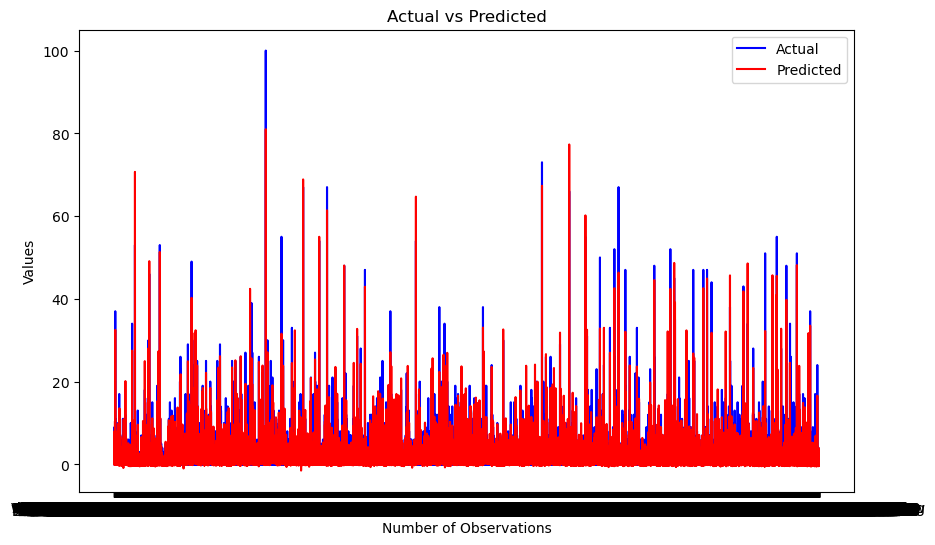

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(YTest, color='blue', label='Actual')
plt.plot(YPred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Number of Observations')
plt.ylabel('Values')
plt.legend()
plt.show()

### LightGBM模型

In [74]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 参数
params = {
    'boosting_type': ['gbdt'],  # 设置提升类型
    'objective': ['regression'],  # 目标函数
    'metric': ['l2'],  # 评估函数
    'num_leaves': np.arange(20, 60, 10),
    'learning_rate': np.linspace(0.01, 0.1, 10),  # 学习速率
    'feature_fraction': np.linspace(0.6, 1.0, 5),  # 建树的特征选择比例
    'bagging_fraction': np.linspace(0.6, 1.0, 5),  # 建树的样本采样比例
    'bagging_freq': np.arange(1, 10, 1),  # k 意味着每 k 次迭代执行bagging
}

# 初始化模型
lgb_model = lgb.LGBMRegressor(colsample_bytree=None, subsample=None, subsample_freq=None)

# 随机搜索
random_search = RandomizedSearchCV(lgb_model, param_distributions=params, n_iter=5, scoring='neg_mean_squared_error', n_jobs=1, cv=5, verbose=3)

# 模型训练
random_search.fit(XTrain, YTrain)

# 打印最佳参数
print("Best parameters found: ",random_search.best_params_)

# 使用最佳参数进行预测
lgb_model = random_search.best_estimator_

y_pred_1 = lgb_model.predict(XTest)

# 模型评估
print('The mse of prediction is:', mean_squared_error(YTest, y_pred_1))
print('The mae of prediction is:',mean_absolute_error(YTest, y_pred_1))
print('The r2 of prediction is:',lgb_model.score(XTrain, YTrain))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END bagging_fraction=0.9, bagging_freq=5, boosting_type=gbdt, feature_fraction=1.0, learning_rate=0.07, metric=l2, num_leaves=50, objective=regression;, score=-0.374 total time=   4.0s
[CV 2/5] END bagging_fraction=0.9, bagging_freq=5, boosting_type=gbdt, feature_fraction=1.0, learning_rate=0.07, metric=l2, num_leaves=50, objective=regression;, score=-1.204 total time=   4.3s
[CV 3/5] END bagging_fraction=0.9, bagging_freq=5, boosting_type=gbdt, feature_fraction=1.0, learning_rate=0.07, metric=l2, num_leaves=50, objective=regression;, score=-0.215 total time=   4.0s
[CV 4/5] END bagging_fraction=0.9, bagging_freq=5, boosting_type=gbdt, feature_fraction=1.0, learning_rate=0.07, metric=l2, num_leaves=50, objective=regression;, score=-0.266 total time=   4.0s
[CV 5/5] END bagging_fraction=0.9, bagging_freq=5, boosting_type=gbdt, feature_fraction=1.0, learning_rate=0.07, metric=l2, num_leaves=50, objective=regression;, sc

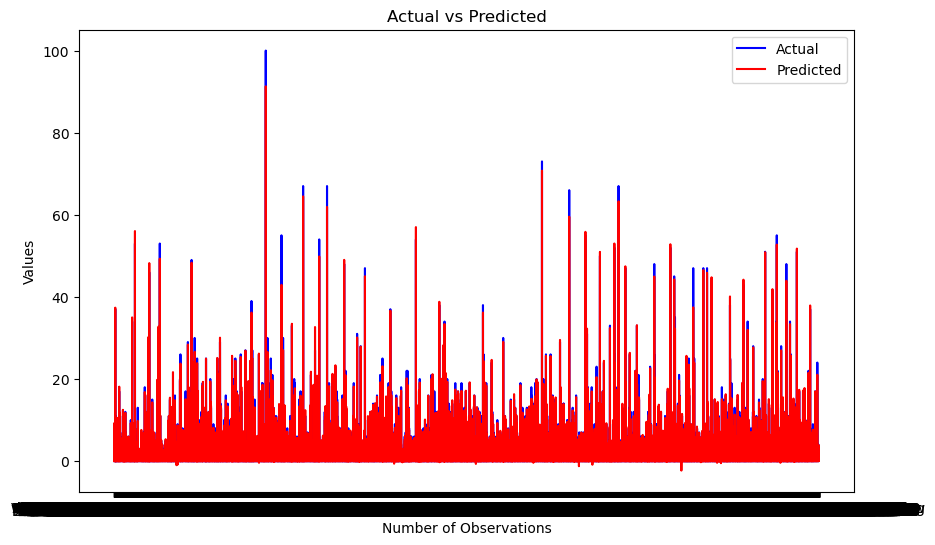

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(YTest, color='blue', label='Actual')
plt.plot(y_pred_1, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Number of Observations')
plt.ylabel('Values')
plt.legend()
plt.show()

### XGBoost模型

In [75]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

print("Train data length:", len(X_train))
print("Test data length:", len(X_test))

# 参数
param = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],  # 树的最大深度
    'eta': [0.01, 0.05, 0.1, 0.2, 0.3],  # 学习率
    'objective': ['reg:linear']}  # 目标函数

# 初始化模型
xgb_model = xgb.XGBRegressor()

# 随机搜索
random_search = RandomizedSearchCV(xgb_model, param_distributions=param, n_iter=5, scoring='neg_mean_squared_error', n_jobs=1, cv=5, verbose=3)

# 模型训练
random_search.fit(XTrain, YTrain)

# 打印最佳参数
print("Best parameters found: ",random_search.best_params_)

# 使用最佳参数进行预测
xgb_model = random_search.best_estimator_
y_pred_2 = xgb_model.predict(XTest)

# 模型评估
print('The mse of prediction is:', mean_squared_error(YTest, y_pred_2))
print('The mae of prediction is:',mean_absolute_error(YTest, y_pred_2))
print('The r2 of prediction is:',xgb_model.score(XTrain, YTrain))

Train data length: 168420
Test data length: 48482
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END eta=0.05, max_depth=9, objective=reg:linear;, score=-0.300 total time=   8.2s
[CV 2/5] END eta=0.05, max_depth=9, objective=reg:linear;, score=-1.309 total time=   8.6s
[CV 3/5] END eta=0.05, max_depth=9, objective=reg:linear;, score=-0.181 total time=   8.1s
[CV 4/5] END eta=0.05, max_depth=9, objective=reg:linear;, score=-0.749 total time=   8.4s
[CV 5/5] END eta=0.05, max_depth=9, objective=reg:linear;, score=-0.471 total time=   8.8s
[CV 1/5] END eta=0.2, max_depth=6, objective=reg:linear;, score=-0.278 total time=   4.3s
[CV 2/5] END eta=0.2, max_depth=6, objective=reg:linear;, score=-1.077 total time=   4.4s
[CV 3/5] END eta=0.2, max_depth=6, objective=reg:linear;, score=-0.157 total time=   4.3s
[CV 4/5] END eta=0.2, max_depth=6, objective=reg:linear;, score=-0.488 total time=   4.4s
[CV 5/5] END eta=0.2, max_depth=6, objective=reg:linear;, score=-0.293 tota

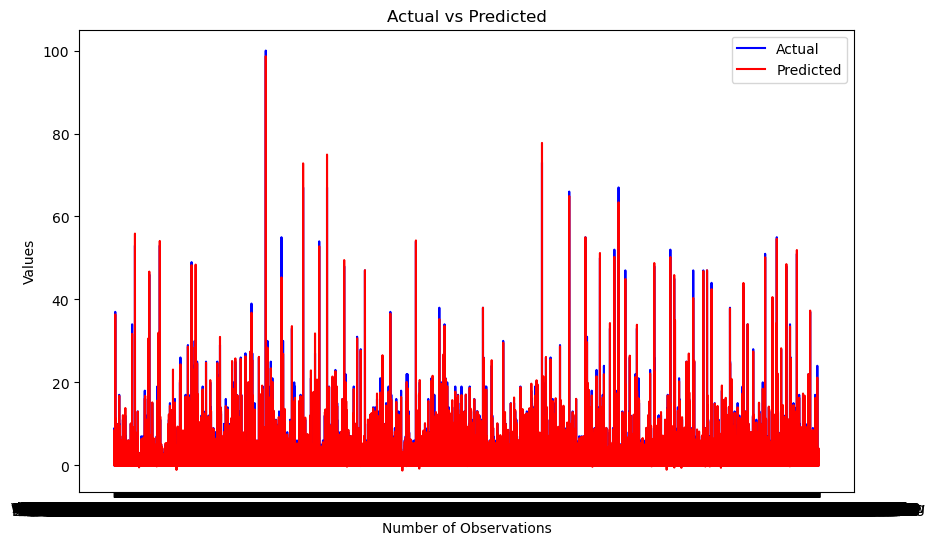

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(YTest, color='blue', label='Actual')
plt.plot(y_pred_2, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Number of Observations')
plt.ylabel('Values')
plt.legend()
plt.show()

### LightGBM和XGBoost模型融合

In [78]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#融合模型
# 预测训练集结果
xgb_pred_train = xgb_model.predict(XTrain)
lgb_pred_train = lgb_model.predict(XTrain)

# 将预测结果作为新的特征
stacked_predictions = np.column_stack((xgb_pred_train, lgb_pred_train))

# 使用线性回归作为元模型进行训练
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, YTrain)

# 预测测试集结果
xgb_pred_test = xgb_model.predict(XTest)
lgb_pred_test = lgb_model.predict(XTest)

# 将预测结果作为新的特征
stacked_test_predictions = np.column_stack((xgb_pred_test, lgb_pred_test))

# 使用元模型进行预测
final_predictions = meta_model.predict(stacked_test_predictions)

# 模型评估
print('The mse of prediction is:', mean_squared_error(YTest, final_predictions))
print('The mae of prediction is:',mean_absolute_error(YTest, final_predictions))

The mse of prediction is: 0.09643541122887749
The mae of prediction is: 0.05824518001642442


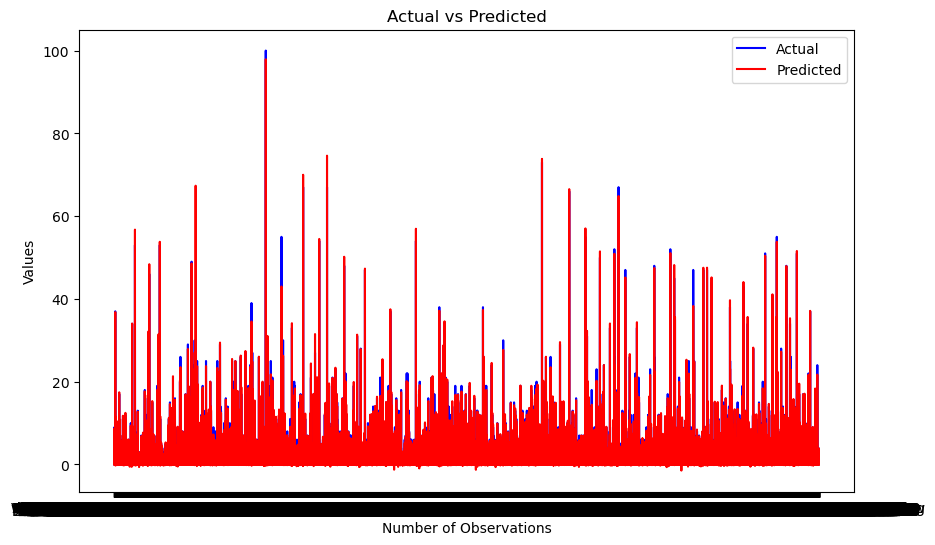

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(YTest, color='blue', label='Actual')
plt.plot(final_predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Number of Observations')
plt.ylabel('Values')
plt.legend()
plt.show()

# 5.模型评价

模型结果：
- 相对于线性模型，LightGBM模型和XGBoost模型都在预测性能上得到很大的提升
- 模型融合的效果并不显著，考虑使用单一模型进行之后的探索性分析

改进：
- 数据集分类：通过餐厅随机分类有利于保证时间上的一致

现实问题探究：
- 探索三类因素和构造特征对评论有效性的预测贡献